# Analysis of Gemeindebauten in Vienna

## **Introduction**
In the heart of Vienna, the Gemeindebauten - publicly subsidized residential buildings - stand as a testament to the city's commitment to providing affordable, high-quality housing. Managed predominantly by the city government, these buildings are not just structures; they are pivotal to the urban fabric, contributing significantly to the quality of life and the city's unique urban planning landscape. This analysis aims to explore various facets such as their distribution across districts, the years of construction, the average number of apartments per building, and uncovering any correlations that might emerge from the data.

The dataset, sourced from Vienna's Open Government Data*, serves as a gateway to understanding these structures more comprehensively.
*Source: https://www.data.gv.at/katalog/dataset/gemeindebau-standorte-wien#additional-info*

### Objectives:
- **Apartment Count Distribution by District**: Analyze the the number of apartments in Gemeindebauten is distributed across Vienna's districts.
- **Construction Years**: Examine the distribution of buildings over different periods based on their construction years.
- **Map the Distribution**: Understand how Gemeindebauten are distributed across Vienna's districts, highlighting any patterns or disparities.
- **Correlation Analysis**: Investigate potential correlations between variables such as apartment count and construction year.

### Significance:
Gemeindebauten are integral to Vienna's urban planning and architectural heritage. By dissecting these elements, this study aims to contribute to a broader understanding of how these buildings are shaped by the city's socio-economic landscape. Additionally, this analysis forms a part of a larger academic endeavor, intersecting with other university courses and personal interests, enriching my holistic understanding of urban infrastructure.

### Anticipated Outcomes:
While this analysis primarily aims to provide a comprehensive overview of the Gemeindebauten in Vienna, it also seeks to uncover patterns and insights that may not be immediately apparent. Through this exploration, I expect to gain a deeper appreciation of the role and impact of these buildings in Vienna's urban landscape.

## **Analysis**

In [3]:
import pandas as pd

data = pd.read_csv('GEMBAUTENFLOGD.csv')

# Am just trying to display the first few rows to verify the data has been loaded correctly
data.head()


,FID,OBJECTID,SHAPE,HOFNAME,WOHNUNGSANZAHL,ADRESSE,BEZIRK,PDFLINK,BAUJAHR,SE_ANNO_CAD_DATA
0,GEMBAUTENFLOGD.18995,18995,MULTIPOLYGON (((16.366093827034852 48.25185291...,BOSCHSTRASSE 24,272.0,Boschstraße 24,19,http://metadb.wrwks.at/open/object_pdf/0519345...,1958,NaN
1,GEMBAUTENFLOGD.18996,18996,MULTIPOLYGON (((16.360513846268752 48.18399816...,WIEDNER HAUPTSTRASSE 132,20.0,Wiedner Hauptstraße 132,5,http://metadb.wrwks.at/open/object_pdf/2105360...,1994,NaN
2,GEMBAUTENFLOGD.19041,19041,MULTIPOLYGON (((16.37165894434907 48.212269170...,FISCHERSTIEGE 1-7,116.0,Fischerstiege 1-7,1,http://metadb.wrwks.at/open/object_pdf/0801305...,1955,NaN
3,GEMBAUTENFLOGD.19042,19042,MULTIPOLYGON (((16.308978860734577 48.19440455...,AMORTGASSE 1-17,227.0,Amortgasse 1-17,14,http://metadb.wrwks.at/open/object_pdf/0814352...,1955,NaN
4,GEMBAUTENFLOGD.19043,19043,"POLYGON ((16.32161029174033 48.21266482504081,...",EISNERGASSE 11-13,28.0,Eisnergasse 11-13,16,http://metadb.wrwks.at/open/object_pdf/1716400...,1985,NaN


In [4]:
# Basic statistics
data.describe()

# Info about columns and their data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FID               1776 non-null   object 
 1   OBJECTID          1776 non-null   int64  
 2   SHAPE             1776 non-null   object 
 3   HOFNAME           1776 non-null   object 
 4   WOHNUNGSANZAHL    1759 non-null   float64
 5   ADRESSE           1759 non-null   object 
 6   BEZIRK            1776 non-null   int64  
 7   PDFLINK           1776 non-null   object 
 8   BAUJAHR           1776 non-null   int64  
 9   SE_ANNO_CAD_DATA  0 non-null      float64
dtypes: float64(2), int64(3), object(5)
memory usage: 138.9+ KB


In [7]:
import matplotlib.pyplot as plt

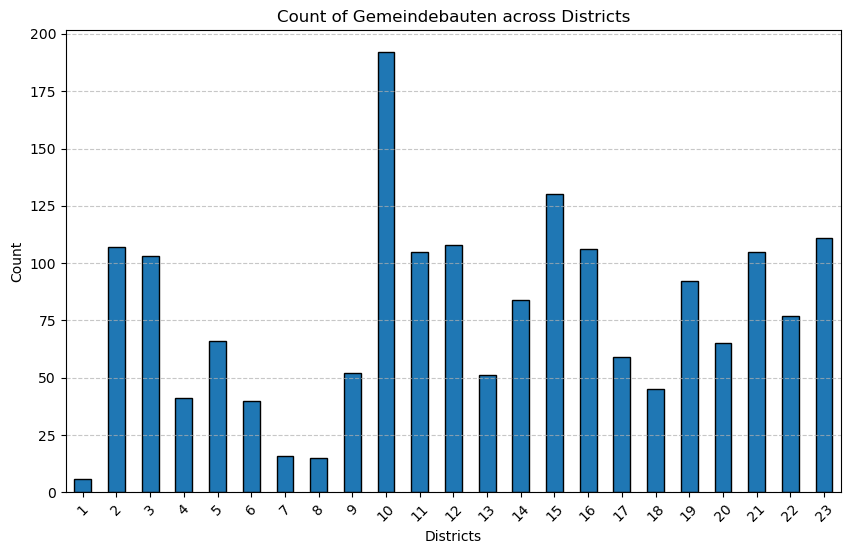

In [9]:
# A histogram showing the number of Gemeindebauten in each district and trying create a bar plot
plt.figure(figsize=(10, 6))
data['BEZIRK'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.xlabel('Districts')
plt.ylabel('Count')
plt.title('Count of Gemeindebauten across Districts')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Note: Okay. That looks somewhat correct. This code was supposed to create a bar plot showing the count of Gemindebauten in each district in Vienna. The x-Achse showing representing the districts and the y-Achse shwoing the number.

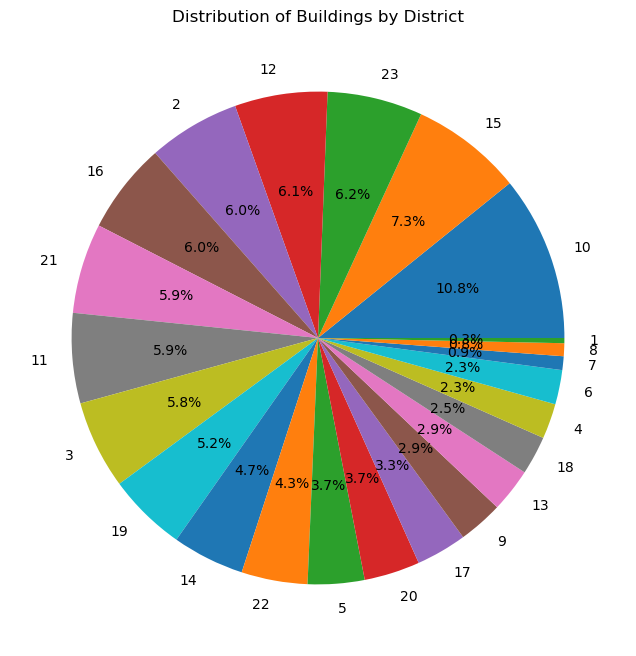

In [16]:
# On to the next try: Showing the distributions using a pie chart

plt.figure(figsize=(8, 8))
data['BEZIRK'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Buildings by District')
plt.ylabel('')
plt.show()


Note: Most Gemeindebauten are located in the 10th district.

Additonal note: The bar chart above better represents the distribution of buildings by district. Making this pie chart obsolete.

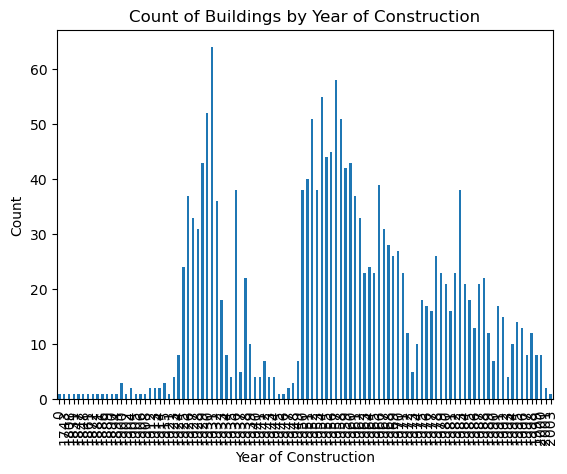

In [15]:
# Next trying out a graph to visualise the Year of Construction.

data['BAUJAHR'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year of Construction')
plt.ylabel('Count')
plt.title('Count of Buildings by Year of Construction')
plt.show()

Note: Okay. So it looks somewhat correct. But the most obvious thing is the x-axis is too pushed together. I am gonna try to to fix that in the following line.

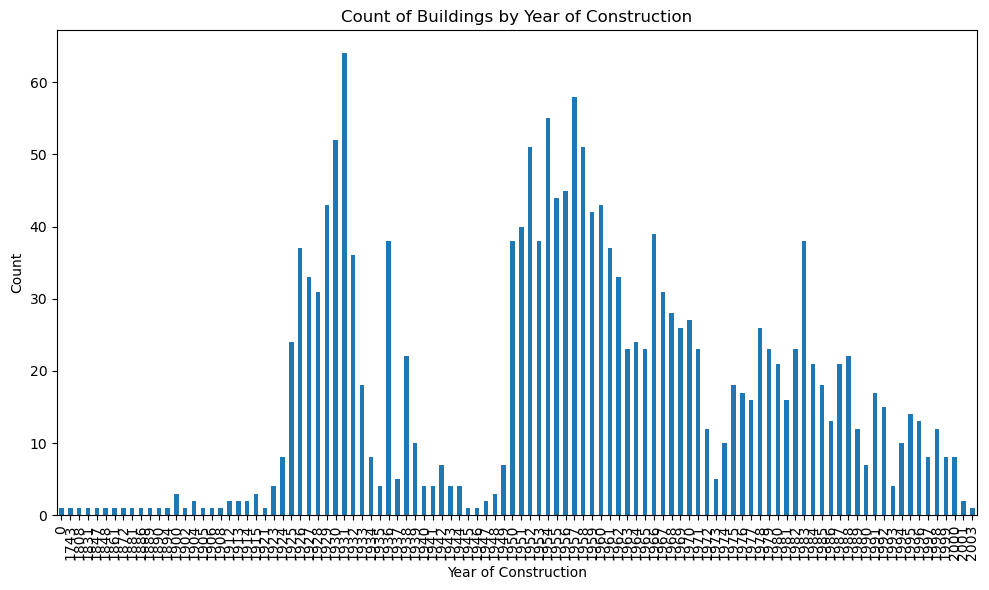

In [13]:
# Trying to fix x in the graph about the Year of Construction.

plt.figure(figsize=(10, 6))
data['BAUJAHR'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year of Construction')
plt.ylabel('Count')
plt.title('Count of Buildings by Year of Construction')
plt.tight_layout()
plt.show()

Note: So now the graph is a bit broader but not much has changed. Now that i can read the years better i also noticed it stopped at 2003.

In [20]:
# As the years are a bit hard to read trying to just find out in which year the most were build.
most_common_year = data['BAUJAHR'].value_counts().idxmax()
print("The year in which the most Gemeindebauten were built:", most_common_year)


The year in which the most Gemeindebauten were built: 1931


Note: Clear answer that seems to match the chart

In [21]:
# Asking for the top three years plus info on how many aparments that was
top_years = data['BAUJAHR'].value_counts().nlargest(3)  # Get top 3 years
for year, count in top_years.items():
    apartments_built = data[data['BAUJAHR'] == year]['WOHNUNGSANZAHL'].sum()
    print(f"In the year {year}, {count} Gemeindebauten were built, totaling {apartments_built} apartments.")


In the year 1931, 64 Gemeindebauten were built, totaling 29638.0 apartments.
In the year 1957, 58 Gemeindebauten were built, totaling 6758.0 apartments.
In the year 1954, 55 Gemeindebauten were built, totaling 9160.0 apartments.


In [21]:
# Trying to filter data for buildings constructed after 2000
recent_buildings = data[data['BAUJAHR'] > 2000]
print(recent_buildings)

                       FID  OBJECTID  \
74    GEMBAUTENFLOGD.18627     18627   
679   GEMBAUTENFLOGD.18116     18116   
1449  GEMBAUTENFLOGD.18717     18717   

                                                  SHAPE  \
74    POLYGON ((16.339506460547618 48.18571247447228...   
679   MULTIPOLYGON (((16.316246603958504 48.14811784...   
1449  POLYGON ((16.44830754445621 48.28789237513356,...   

                      HOFNAME  WOHNUNGSANZAHL                 ADRESSE  BEZIRK  \
74            KORBERGASSE 4-6            17.0         Korbergasse 4-6      12   
679          ROESSLERGASSE 15            74.0          Rößlergasse 15      23   
1449  GERASDORFER STRASSE 332            19.0  Gerasdorfer Straße 332      21   

                                                PDFLINK  BAUJAHR  \
74    http://metadb.wrwks.at/open/object_pdf/2312413...     2001   
679   http://metadb.wrwks.at/open/object_pdf/2323415...     2003   
1449  http://metadb.wrwks.at/open/object_pdf/2321439...     2001   

    

Note: Now that I did this i relaised that there were no other Gemeindebaus build after 2003. So the one graph ending at 2003 makes more sense now to me.

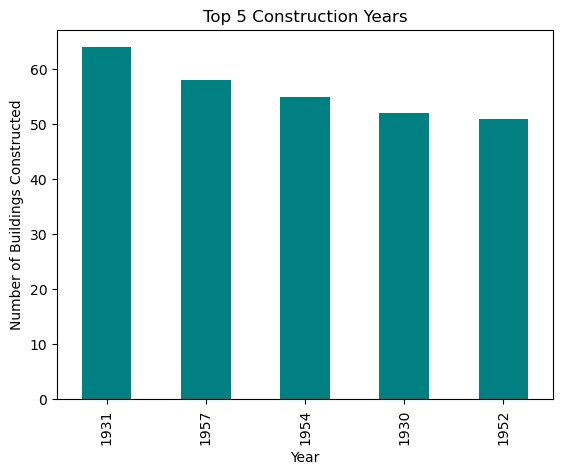

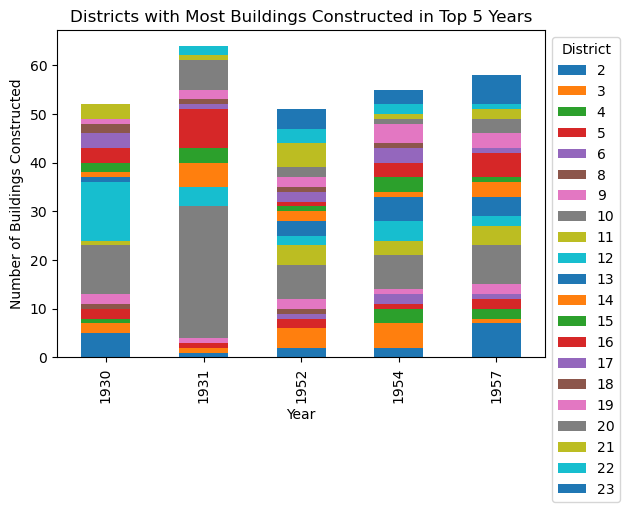

In [5]:
#Viewing the Top 5 Construction Years and in which distrctocs was build that year

import pandas as pd

gemeindebauten_data = pd.read_csv('GEMBAUTENFLOGD.csv')

top_years = gemeindebauten_data['BAUJAHR'].value_counts().head(5)
top_districts_by_year = gemeindebauten_data[gemeindebauten_data['BAUJAHR'].isin(top_years.index)].groupby(['BAUJAHR', 'BEZIRK']).size()

# Chart for top 5 construction years
import matplotlib.pyplot as plt

# Assuming top_years is already calculated
top_years.plot(kind='bar', color='teal')
plt.title('Top 5 Construction Years')
plt.xlabel('Year')
plt.ylabel('Number of Buildings Constructed')
plt.show()

# Chart for District in Top 5 Years
# Assuming top_districts_by_year is already calculated
top_districts_by_year.unstack().plot(kind='bar', stacked=True)
plt.title('Districts with Most Buildings Constructed in Top 5 Years')
plt.xlabel('Year')
plt.ylabel('Number of Buildings Constructed')
plt.legend(title='District', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [6]:
# Having it spell it out because the colours are a bit confusing.
top_years = gemeindebauten_data['BAUJAHR'].value_counts().head(5).index
top_districts_in_top_years = {}
for year in top_years:
    year_data = gemeindebauten_data[gemeindebauten_data['BAUJAHR'] == year]
    top_district = year_data['BEZIRK'].value_counts().idxmax()
    top_district_count = year_data['BEZIRK'].value_counts().max()
    top_districts_in_top_years[year] = (top_district, top_district_count)

# Display the results
for year, (district, count) in top_districts_in_top_years.items():
    print(f"In {year}, the most buildings were constructed in District {district} with {count} buildings.")


In 1931, the most buildings were constructed in District 10 with 27 buildings.
In 1957, the most buildings were constructed in District 10 with 8 buildings.
In 1954, the most buildings were constructed in District 10 with 7 buildings.
In 1930, the most buildings were constructed in District 12 with 12 buildings.
In 1952, the most buildings were constructed in District 10 with 7 buildings.


In [22]:
# Trying to again to display it in a more readable way.
buildings_after_2000 = data[data['BAUJAHR'] > 2000][['HOFNAME', 'WOHNUNGSANZAHL']]

print(f"After the year 2000, {len(buildings_after_2000)} Gemeindebauten were built:")
for index, row in buildings_after_2000.iterrows():
    print(f"- Building '{row['HOFNAME']}' with {row['WOHNUNGSANZAHL']} apartments")


After the year 2000, 3 Gemeindebauten were built:
- Building 'KORBERGASSE 4-6' with 17.0 apartments
- Building 'ROESSLERGASSE 15' with 74.0 apartments
- Building 'GERASDORFER STRASSE 332' with 19.0 apartments


In [23]:
# Adding the year at the end 
buildings_after_2000 = data[data['BAUJAHR'] > 2000][['BAUJAHR', 'HOFNAME', 'WOHNUNGSANZAHL']]

print(f"After the year 2000, {len(buildings_after_2000)} Gemeindebauten were built:")
for index, row in buildings_after_2000.iterrows():
    print(f"- Building '{row['HOFNAME']}' with {row['WOHNUNGSANZAHL']} apartments, built in {row['BAUJAHR']}")


After the year 2000, 3 Gemeindebauten were built:
- Building 'KORBERGASSE 4-6' with 17.0 apartments, built in 2001
- Building 'ROESSLERGASSE 15' with 74.0 apartments, built in 2003
- Building 'GERASDORFER STRASSE 332' with 19.0 apartments, built in 2001


In [17]:
# Calculating the average number of apartments per district
avg_apartments_per_district = data.groupby('BEZIRK')['WOHNUNGSANZAHL'].mean()
print(avg_apartments_per_district)


BEZIRK
1      53.833333
2     106.650943
3      91.844660
4      46.292683
5      95.000000
6      39.875000
7      34.687500
8      40.133333
9      35.961538
10    389.305085
11    464.076923
12    154.296296
13     90.000000
14    126.595238
15     56.800000
16    118.915094
17     73.389831
18     70.911111
19    110.173913
20    194.523077
21    299.019048
22    320.246753
23    119.783784
Name: WOHNUNGSANZAHL, dtype: float64


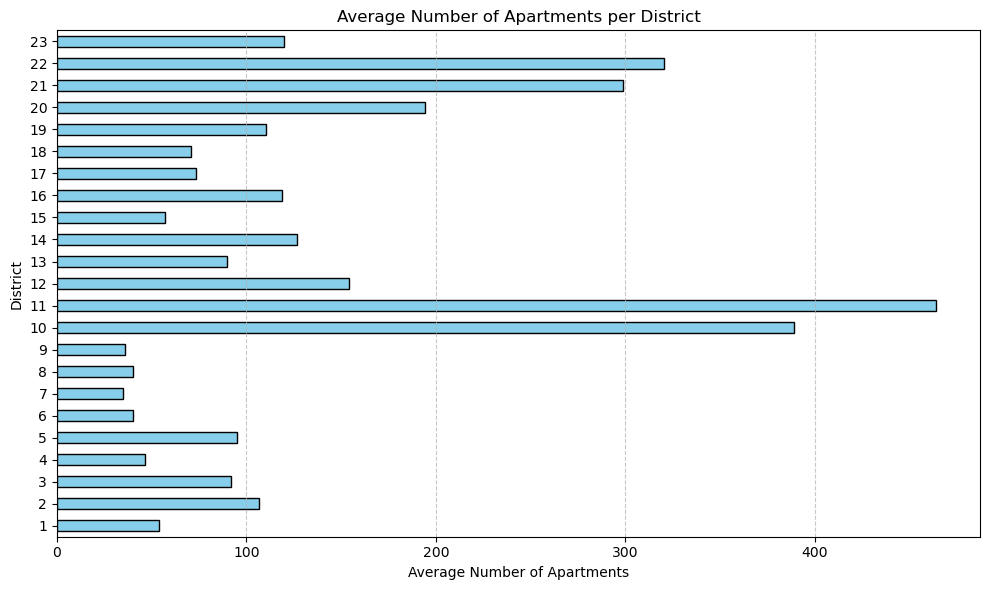

In [18]:
# Making a the bar chart to that
plt.figure(figsize=(10, 6))
avg_apartments_per_district.plot(kind='barh', color='skyblue', edgecolor='black')

plt.xlabel('Average Number of Apartments')
plt.ylabel('District')
plt.title('Average Number of Apartments per District')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Note: This turned out pretty. 

In [6]:
# Average Apartmet Count per Building
avg_apartments_per_building = data.groupby('HOFNAME')['WOHNUNGSANZAHL'].mean().sort_values()
print(avg_apartments_per_building)


HOFNAME
ALSERBACHSTRASSE 41       0.0
KALVARIENBERGGASSE 31     0.0
SPITTELBREITENGASSE 38    0.0
SAEULENGASSE 20           1.0
SCHEIBENBERGSTRASSE 71    1.0
                         ... 
WEITMOSERGASSE 51         NaN
WEITMOSERGASSE 53         NaN
WEITMOSERGASSE 55         NaN
WEITMOSERGASSE 7          NaN
WEITMOSERGASSE 9          NaN
Name: WOHNUNGSANZAHL, Length: 1733, dtype: float64


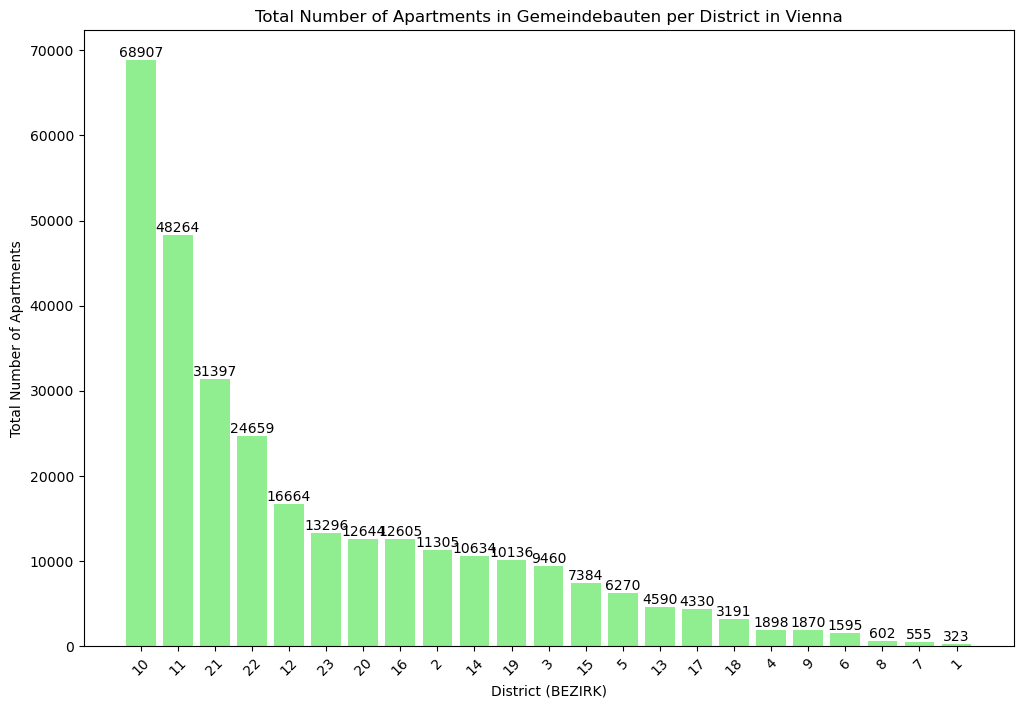

In [7]:
#Total Number of Gemeindebauaparments per District

total_apartments_per_district = gemeindebauten_data.groupby('BEZIRK')['WOHNUNGSANZAHL'].sum().reset_index()
total_apartments_per_district_sorted = total_apartments_per_district.sort_values(by='WOHNUNGSANZAHL', ascending=False)

# Creating the bar plot
plt.figure(figsize=(12, 8))
plt.bar(total_apartments_per_district_sorted['BEZIRK'].astype(str), total_apartments_per_district_sorted['WOHNUNGSANZAHL'], color='lightgreen')

plt.xlabel('District (BEZIRK)')
plt.ylabel('Total Number of Apartments')
plt.title('Total Number of Apartments in Gemeindebauten per District in Vienna')
plt.xticks(rotation=45)

for index, value in enumerate(total_apartments_per_district_sorted['WOHNUNGSANZAHL']):
    plt.text(index, value, str(int(value)), ha='center', va='bottom')

# Show the plot
plt.show()

In [15]:
# Correlation Analysis between the variables 'WOHNUNGSANZAHL' (apartment count) and 'BAUJAHR' (construction year)
correlation_matrix = data[['WOHNUNGSANZAHL', 'BAUJAHR']].corr()
print(correlation_matrix)

                WOHNUNGSANZAHL   BAUJAHR
WOHNUNGSANZAHL        1.000000 -0.091295
BAUJAHR              -0.091295  1.000000


Note: So I thought this might be interesting because analyzing the correlation between apartment count and construction year could unveil historical housing trends, revealing whether newer constructions tend to feature a different apartment count structure compared to older buildings. Looking at this numbers and trying to remember correlation from high school am interpreting the results as: 
- The correlation coefficient between 'WOHNUNGSANZAHL' and itself is 1, which is expected.
- The correlation coefficient between 'BAUJAHR' and itself is also 1, as expected.
- The correlation coefficient between 'WOHNUNGSANZAHL' and 'BAUJAHR' is approximately -0.091295.

The value -0.091295 suggests a very weak negative correlation (close to 0) between the apartment count ('WOHNUNGSANZAHL') and the construction year ('BAUJAHR'). So herefore: 
- A coefficient close to 0 indicates a very weak linear relationship between the two variables.
- The negative sign indicates a very very slight tendency that as one variable increases, the other might decrease slightly, and vice versa?
- Changes in one variable are not significantly associated with changes in the other variable based on a linear scale.
- But tbh it seems to me that, this correlation is way too weak to draw any substantial conclusions regarding their relationship.

In [22]:
# Trying to get info on the specific Gemeindebau Goethehof that I live in
goethehof_info = data[data['HOFNAME'] == 'Goethehof']
print(goethehof_info)

                     FID  OBJECTID  \
27  GEMBAUTENFLOGD.19013     19013   

                                                SHAPE    HOFNAME  \
27  MULTIPOLYGON (((16.419628394345928 48.22921096...  Goethehof   

    WOHNUNGSANZAHL              ADRESSE  BEZIRK  \
27           677.0  Schüttaustraße 1-39      22   

                                              PDFLINK  BAUJAHR  \
27  http://metadb.wrwks.at/open/object_pdf/0822310...     1931   

    SE_ANNO_CAD_DATA  
27               NaN  


In [26]:
# Doing it again but displayed easier readable.
goethehof_data = data[data['HOFNAME'] == 'Goethehof']

total_apartments = goethehof_data['WOHNUNGSANZAHL'].sum()
construction_years = goethehof_data['BAUJAHR'].unique()
num_construction_years = len(construction_years)
min_year, max_year = min(construction_years), max(construction_years)
district = goethehof_data['BEZIRK'].iloc[0]
address = goethehof_data['ADRESSE'].iloc[0]

print(f"The 'Goethehof' Gemeindebau:")
print(f"Total number of apartments: {total_apartments}")
print(f"Constructed over {num_construction_years} years, from {min_year} to {max_year}")
print(f"Located in District: {district}")
print(f"The Address is: {address}")


The 'Goethehof' Gemeindebau:
Total number of apartments: 677.0
Constructed over 1 years, from 1931 to 1931
Located in District: 22
The Address is: Schüttaustraße 1-39


### Displaying info on a vienna map

In [41]:
import geopandas as gpd

shapefile_path = 'C:/Users/mercy/Documents/Vienna/BEZIRKSGRENZEOGDPolygon.shp'
data = gpd.read_file(shapefile_path)

# Checking the loaded data
data.head()


,NAMEK,BEZNR,BEZ_RZ,NAMEK_NUM,NAMEK_RZ,NAMEG,LABEL,BEZ,DISTRICT_C,STATAUSTRI,STATAUSTR0,FLAECHE,UMFANG,AKT_TIMEST,SE_SDO_ROW,geometry
0,Hietzing,13.0,XIII,"13., Hietzing",XIII. Hietzing,HIETZING,XIII.,13,1130.0,913.0,91301.0,3.771397e+07,29668.16,2023-07-18,13126.0,"POLYGON ((16.21423 48.20652, 16.21424 48.20651..."
1,Rudolfsheim-Fünfhaus,15.0,XV,"15., Rudolfsheim-Fünfhaus",XV. Rudolfsheim-Fünfhaus,RUDOLFSHEIM-FÜNFHAUS,XV.,15,1150.0,915.0,91501.0,3.916953e+06,9711.71,2023-07-18,13127.0,"POLYGON ((16.32732 48.20500, 16.33365 48.20405..."
2,Neubau,7.0,VII,"7., Neubau",VII. Neubau,NEUBAU,VII.,07,1070.0,907.0,90701.0,1.608248e+06,5312.54,2023-07-18,13128.0,"POLYGON ((16.33872 48.20853, 16.33901 48.20848..."
3,Landstraße,3.0,III,"3., Landstraße",III. Landstraße,LANDSTRASSE,III.,03,1030.0,903.0,90301.0,7.403038e+06,13961.80,2023-07-18,13129.0,"POLYGON ((16.39661 48.20738, 16.39677 48.20655..."
4,Josefstadt,8.0,VIII,"8., Josefstadt",VIII. Josefstadt,JOSEFSTADT,VIII.,08,1080.0,908.0,90801.0,1.089946e+06,4170.30,2023-07-18,13130.0,"POLYGON ((16.34914 48.21515, 16.35098 48.21496..."


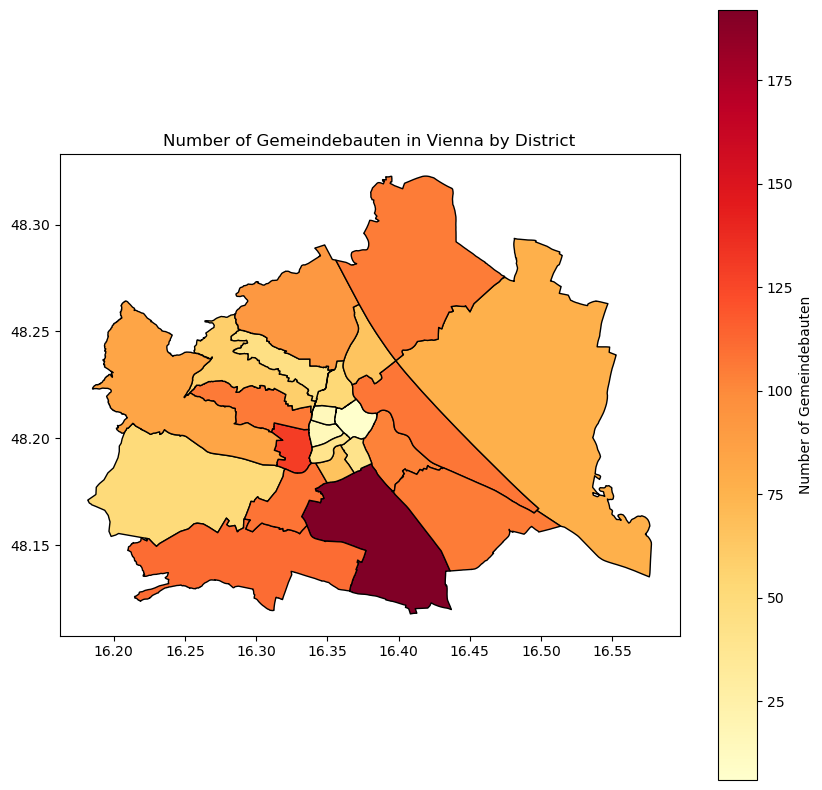

In [75]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load district boundaries data from added Geodata files
vienna_districts = gpd.read_file("C:/Users/mercy/Documents/Vienna/BEZIRKSGRENZEOGDPolygon.shp")

# Readding Gemeindebauten data
gemeindebauten = pd.read_csv("GEMBAUTENFLOGD.csv")

# Grouping Gemeindebauten by district and count occurrences in each district
gemeindebauten_count = gemeindebauten.groupby('BEZIRK').size().reset_index(name='GemeindebautenCount')

# Merge district boundaries with gemeindebauten counts
vienna_districts_with_counts = vienna_districts.merge(gemeindebauten_count, how='left', left_on='BEZNR', right_on='BEZIRK')

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 10))
vienna_districts_with_counts.plot(ax=ax, column='GemeindebautenCount', cmap='YlOrRd', legend=True,
                                  legend_kwds={'label': "Number of Gemeindebauten"},
                                  edgecolor='black')
plt.title('Number of Gemeindebauten in Vienna by District')
plt.show()


Note: After multiple tries it finally looks like something. Going to add a line to add the numbers into the map.

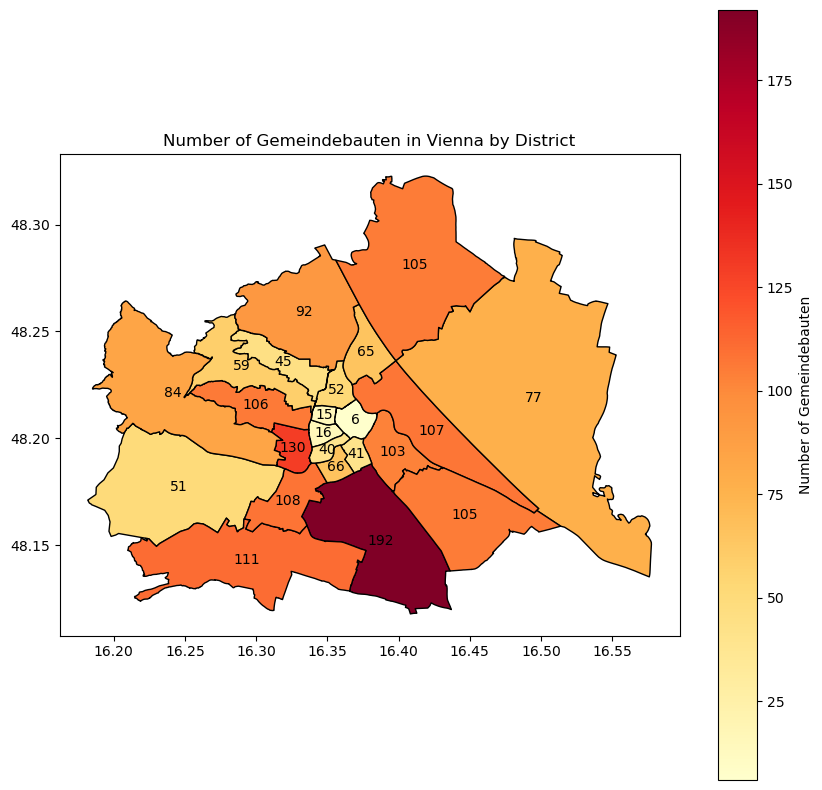

In [78]:
# Adjusting so that the numbers are also visible in the map

# Load district boundaries data from added Geodata files
vienna_districts = gpd.read_file("C:/Users/mercy/Documents/Vienna/BEZIRKSGRENZEOGDPolygon.shp")

# Readding Gemeindebauten data
gemeindebauten = pd.read_csv("GEMBAUTENFLOGD.csv")  # Update with your CSV file name and path

# Group gemeindebauten by district and count occurrences in each district
gemeindebauten_count = gemeindebauten.groupby('BEZIRK').size().reset_index(name='GemeindebautenCount')

# Merge district boundaries with Gemeindebauten counts
vienna_districts_with_counts = vienna_districts.merge(gemeindebauten_count, how='left', left_on='BEZNR', right_on='BEZIRK')

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 10))
vienna_districts_with_counts.plot(ax=ax, column='GemeindebautenCount', cmap='YlOrRd', legend=True,
                                  legend_kwds={'label': "Number of Gemeindebauten"},
                                  edgecolor='black')

# Adding number of Gemeindebauten in each district
for idx, row in vienna_districts_with_counts.iterrows():
    plt.annotate(text=str(row['GemeindebautenCount']), xy=row.geometry.centroid.coords[0], color='black',
                 ha='center', va='center')

plt.title('Number of Gemeindebauten in Vienna by District')
plt.show()


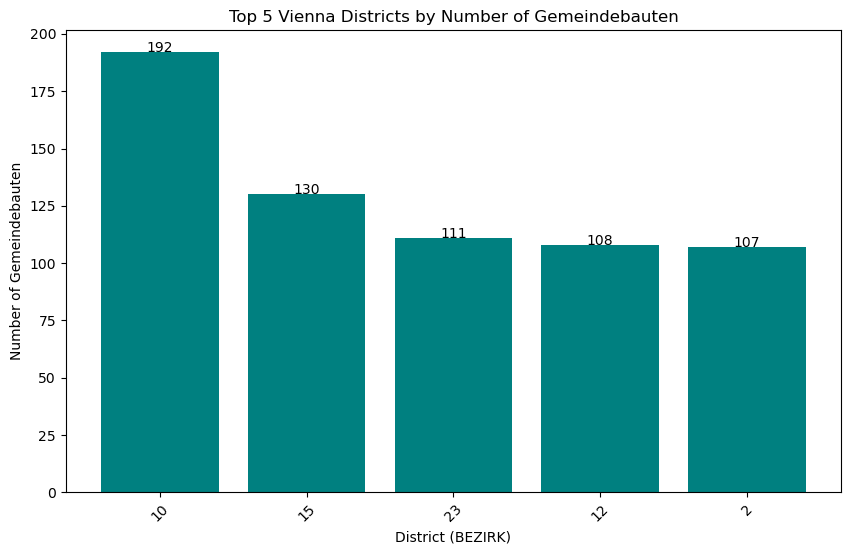

In [4]:
#Pointing out the top 5 Districts

import pandas as pd
import matplotlib.pyplot as plt

file_path = 'GEMBAUTENFLOGD.csv'
gemeindebauten_data = pd.read_csv(file_path)

district_analysis = gemeindebauten_data.groupby('BEZIRK').agg(
    Anzahl_Gemeindebauten=pd.NamedAgg(column='HOFNAME', aggfunc='count'),
    Durchschnittliche_Wohnungsanzahl=pd.NamedAgg(column='WOHNUNGSANZAHL', aggfunc='mean')
)

district_analysis = district_analysis.reset_index()
district_analysis_sorted = district_analysis.sort_values(by='Anzahl_Gemeindebauten', ascending=False)

top_districts = district_analysis_sorted.head()

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_districts['BEZIRK'].astype(str), top_districts['Anzahl_Gemeindebauten'], color='teal')

plt.xlabel('District (BEZIRK)')
plt.ylabel('Number of Gemeindebauten')
plt.title('Top 5 Vienna Districts by Number of Gemeindebauten')
plt.xticks(rotation=45)

# Adding the counts above the bars
for index, value in enumerate(top_districts['Anzahl_Gemeindebauten']):
    plt.text(index, value, str(value), ha='center')

# Show the plot
plt.show()


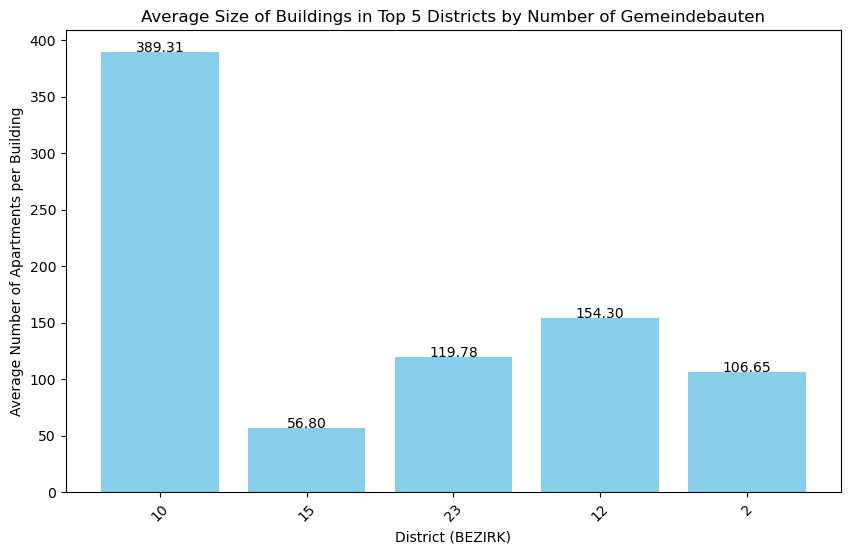

In [5]:
import matplotlib.pyplot as plt

# Selecting the top 5 districts based on the number of Gemeindebauten for focused comparison
top_districts_by_size = district_analysis_sorted.head()

# Creating the bar plot for average size of buildings
plt.figure(figsize=(10, 6))
plt.bar(top_districts_by_size['BEZIRK'].astype(str), top_districts_by_size['Durchschnittliche_Wohnungsanzahl'], color='skyblue')

plt.xlabel('District (BEZIRK)')
plt.ylabel('Average Number of Apartments per Building')
plt.title('Average Size of Buildings in Top 5 Districts by Number of Gemeindebauten')
plt.xticks(rotation=45)

for index, value in enumerate(top_districts_by_size['Durchschnittliche_Wohnungsanzahl']):
    plt.text(index, value, f"{value:.2f}", ha='center')

# Show the plot
plt.show()


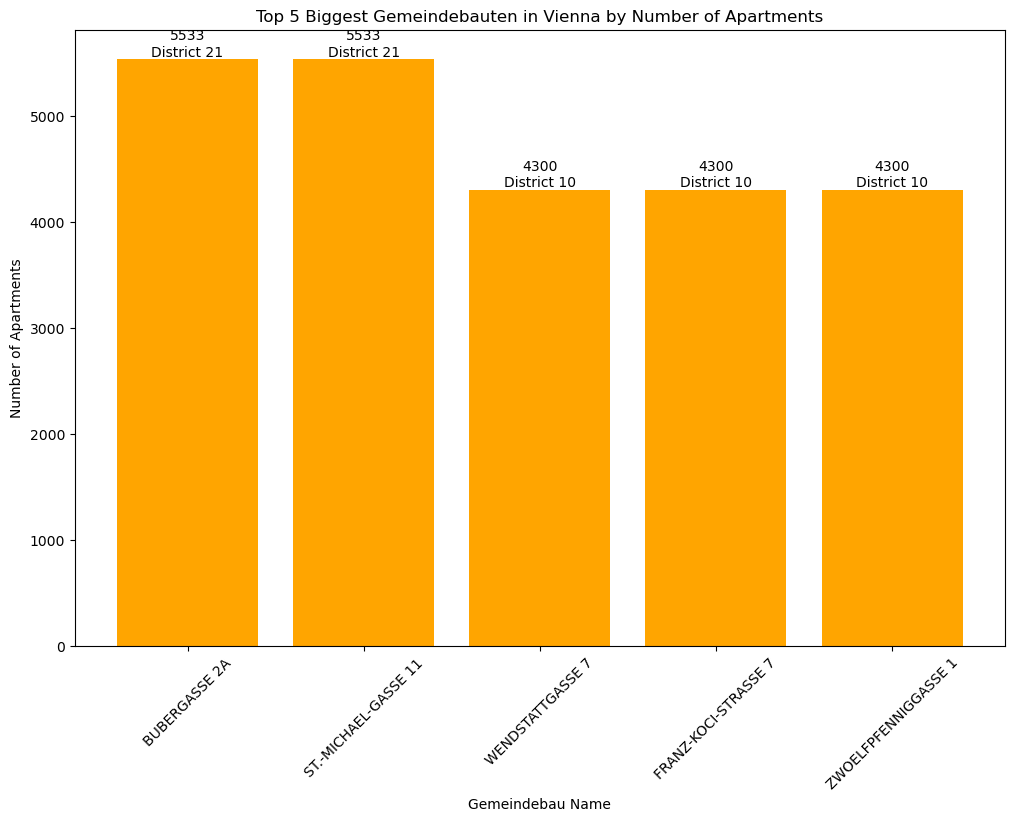

In [8]:
# Visualising  the biggest Gemeindebau by number of Aparments on Streetname

top_gemeindebauten = gemeindebauten_data.sort_values(by='WOHNUNGSANZAHL', ascending=False).head(5)

plt.figure(figsize=(12, 8))
bars = plt.bar(top_gemeindebauten['HOFNAME'], top_gemeindebauten['WOHNUNGSANZAHL'], color='orange')

plt.xlabel('Gemeindebau Name')
plt.ylabel('Number of Apartments')
plt.title('Top 5 Biggest Gemeindebauten in Vienna by Number of Apartments')
plt.xticks(rotation=45)

# Adding the number of apartments and district on top of each bar to have all the info in one
for bar, district in zip(bars, top_gemeindebauten['BEZIRK']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}\nDistrict {district}', ha='center', va='bottom')

# Show the plot
plt.show()


## **Conclusion**

The analysis of Vienna's Gemeindebauten reveals a diverse distribution patterns and varied building sizes across the city's districts.

1. **Uneven Distribution Across Districts:**
The concentration of Gemeindebauten varies significantly across Vienna's districts. District 10 (Favoriten) leads with the highest number of Gemeindebauten, followed by Districts 15, 23, 12, and 2. This disparity might reflect historical and socio-economic factors influencing urban planning decisions, with certain districts prioritized for public housing development based on their size, population density, or developmental needs.
2. **Building Sizes Indicative of Urban Policies:**
The average size of Gemeindebauten, as indicated by the number of apartments, varies notably. District 10 not only has the highest count of buildings but also the largest ones on average, suggesting an approach focused on large-scale housing solutions. In contrast, other leading districts exhibit smaller average building sizes, potentially indicating varied urban development strategies and changing housing policies over time.
3. **Total Number of Apartments Highlighting Housing Capacity:**
When examining the total number of apartments per district, the chart underscores the substantial capacity of certain districts, especially District 10, to house a large population. This capacity directly reflects the city's commitment to providing accessible and affordable housing.


The comprehensive analysis of Vienna's Gemeindebauten, including their distribution, size, and capacity, paints a picture of a city deeply invested in public housing. The patterns observed suggest a historical evolution in housing policy, with different districts receiving varied focus over the years.
